## GlucoTrack Project

Objective: to work with a real-world CDC dataset and build a complete pipeline from data preprocessing to deployment using tools like PyTorch/TensorFlow, SHAP, and MLflow to glean insight for Diabetes risk factors.

Source: CDC Diabetes Health Indicators
- Outcome variable: Individuals are classified as diabetic (1) or non-diabetic (0)
- Features: Health, lifestyle, and demographic indicators. 
- All responses were obtained from phone surveys conducted as part of the CDC Behavioral Risk Factor Surveillance System (BRFSS). 
- Few questions represent objective lab measurements (cholesterol, high blood pressure); most are subjective measures of self-assessed health and lifestyle factors. 
- From the UCI repo, it looks like the data was collected in 2014
- Data collection methods can be found here and are an important part of the context of the representative nature of the potential findings to the general population:
https://www.cdc.gov/brfss/annual_data/2014/pdf/Overview_2014.pdf

I have built a feed forward neural network to attempt to predict the features from the dataset associated with the risk of a diabetes diagnosis. The model performance overall was poor, although the recall metric was fairly good and resulted in the top features being associated with clinically relevant results.

I would now like to contrast those results with a simpler model.

In [3]:
import mlflow
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, 
    roc_auc_score, confusion_matrix, classification_report
)
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
# Suppress specific warning categories
warnings.filterwarnings('ignore', category=UserWarning)
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', message='.*caveats.*')

# Suppress pandas SettingWithCopyWarning
pd.options.mode.chained_assignment = None  # default='warn'
warnings.filterwarnings('ignore', category=pd.errors.SettingWithCopyWarning)

print(f"Libraries imported successfully!")
print(f"MLflow version: {mlflow.__version__}")

Libraries imported successfully!
MLflow version: 3.2.0


## **I need to import the results from Week 4 FFNN and SHAP for complete comparison**

🔄 Loading FFNN model and results from SHAP notebook...
Using device: cpu
Libraries imported successfully!
PyTorch version: 2.8.0+cpu
MLflow version: 3.2.0
SHAP version: 0.48.0
=== LOADING DATA FROM WEEK 2 ===
Using device: cpu
Libraries imported successfully!
PyTorch version: 2.8.0+cpu
MLflow version: 3.2.0
SHAP version: 0.48.0
Fetching CDC Diabetes Health Indicators dataset...
Dataset loaded successfully!
Initial dataset shape: (253680, 22)
Memory usage: 42.58 MB
=== DUPLICATE ROWS ===
Original dataset rows: 253680
Unique observations: 229474
Duplicate rows: 24206

After removing duplicates:
Cleaned dataset rows: 229474
Rows removed: 24206
=== DATA TYPE OPTIMIZATION ===
Current data types:
int64    22
Name: count, dtype: int64

Analyzing float columns for potential integer conversion:
  HighBP: Optimized to uint8 (range: 0-1)
  HighChol: Optimized to uint8 (range: 0-1)
  CholCheck: Optimized to uint8 (range: 0-1)
  BMI: Optimized to uint8 (range: 12-98)
  Smoker: Optimized to uint8 (r

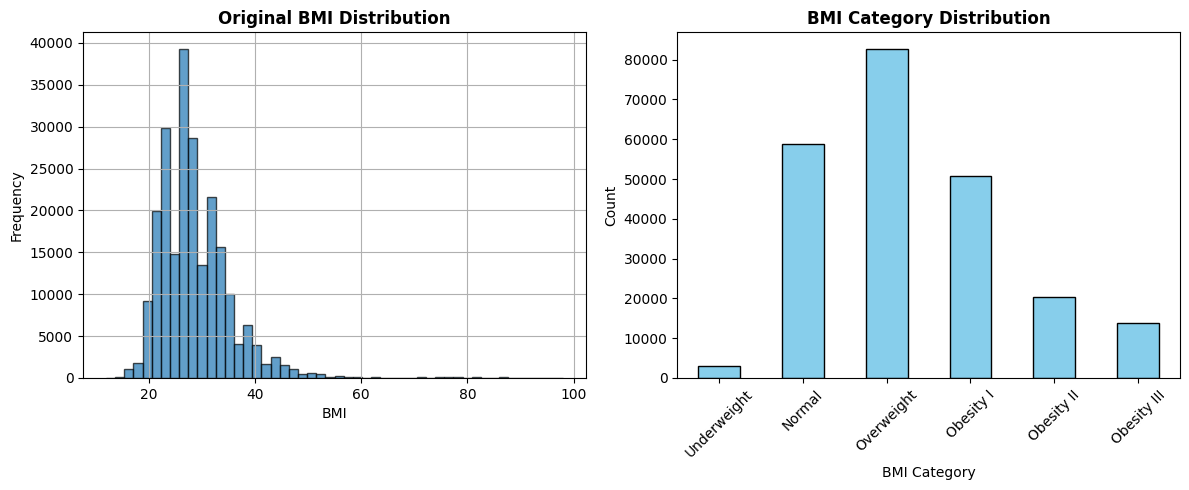


BMI Categories vs Diabetes Risk:
Diabetes_binary      0      1
bmi_category                 
0                94.46   5.54
1                93.36   6.64
2                87.23  12.77
3                79.89  20.11
4                72.35  27.65
5                66.41  33.59
['GenHlth', 'Age', 'Education', 'Income', 'bmi_category']
Scaled continuous features:
            MentHlth       PhysHlth
count  233252.000000  233252.000000
mean        1.294628       0.852740
std         2.759805       1.448567
min         0.000000       0.000000
25%         0.000000       0.000000
50%         0.000000       0.000000
75%         1.000000       1.000000
max        10.000000       4.285714
Original continuous features:
            MentHlth       PhysHlth
count  229474.000000  229474.000000
mean        3.509866       4.681219
std         7.717643       9.050877
min         0.000000       0.000000
25%         0.000000       0.000000
50%         0.000000       0.000000
75%         2.000000       4.00000

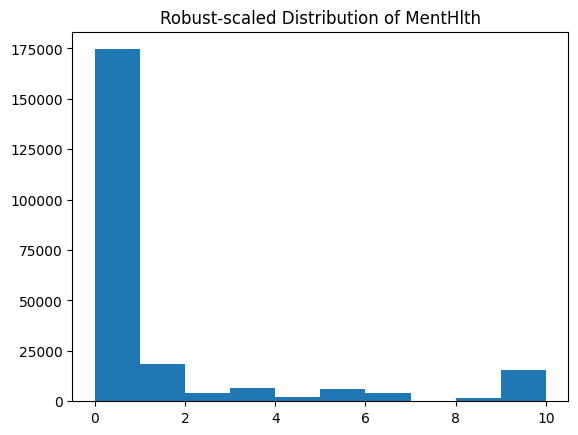

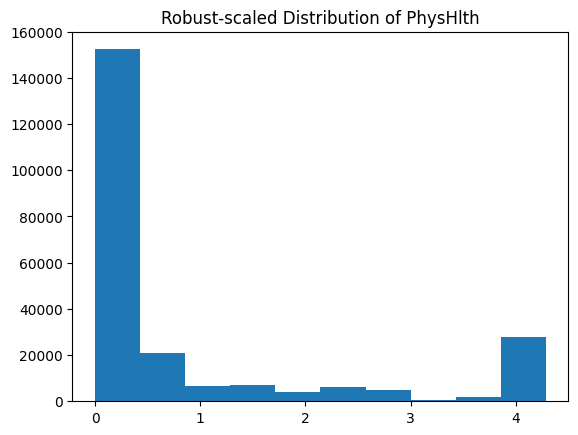

Train set class distribution:
Diabetes_binary
1    0.5
0    0.5
Name: proportion, dtype: float64

Validation set class distribution:
Diabetes_binary
0    0.847042
1    0.152958
Name: proportion, dtype: float64

Test set class distribution:
Diabetes_binary
0    0.847064
1    0.152936
Name: proportion, dtype: float64
Features shape: torch.Size([64, 21])
Labels shape: torch.Size([64, 1])

Data loaded successfully from Week 2 notebook!
Training set: (233252, 21)
Validation set: (45895, 21)
Test set: (45895, 21)
Target distribution - Training: Diabetes_binary
1    0.5
0    0.5
Name: proportion, dtype: float64
Class imbalance ratio: 1.0:1
✅ All required variables loaded successfully!
   Available variables: ['X_train_scaled', 'X_val_scaled', 'X_test_scaled', 'y_train_resampled', 'y_val', 'y_test']
Epoch 1/10: Val F1: 0.4255, Val Loss: 0.5530, LR: 0.000100
Epoch 1/10: New best model saved with Val F1: 0.4255
Epoch 2/10: Val F1: 0.4234, Val Loss: 0.5506, LR: 0.000100
Epoch 3/10: Val F1: 0.4224

<Figure size 800x600 with 0 Axes>

=== SHAP EXPLAINABILITY ANALYSIS ===
Background data shape: (100, 21)
Explanation data shape: (200, 21)
Initializing SHAP explainer...
Calculating SHAP values...
✅ SHAP analysis completed!
SHAP values shape: (200, 21)
Creating SHAP summary plot...


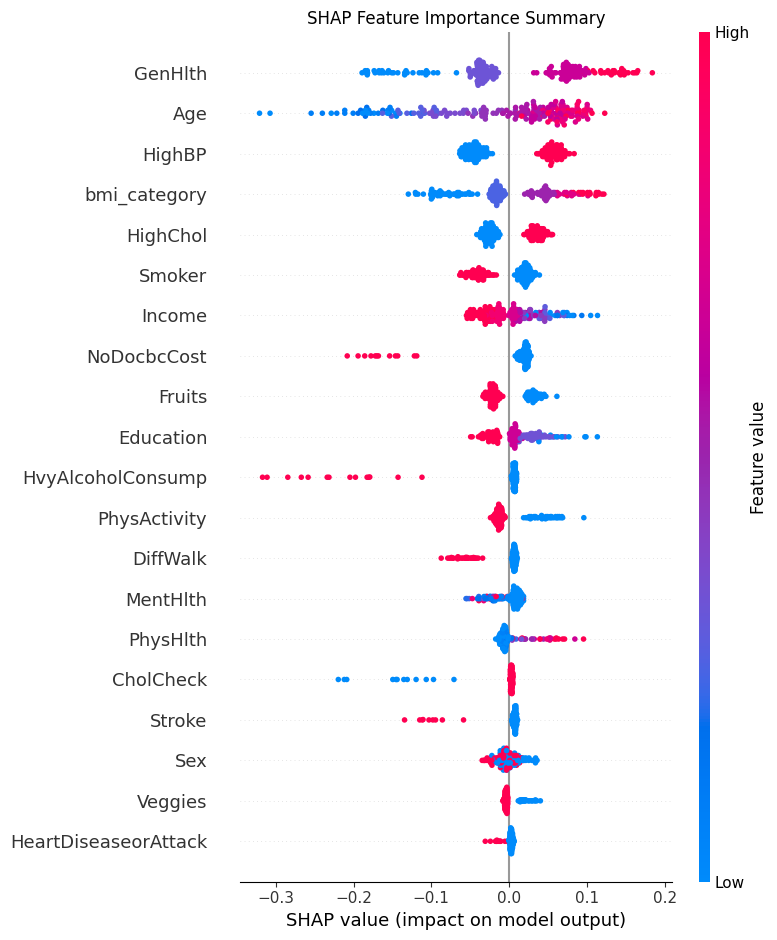

Creating SHAP bar plot...


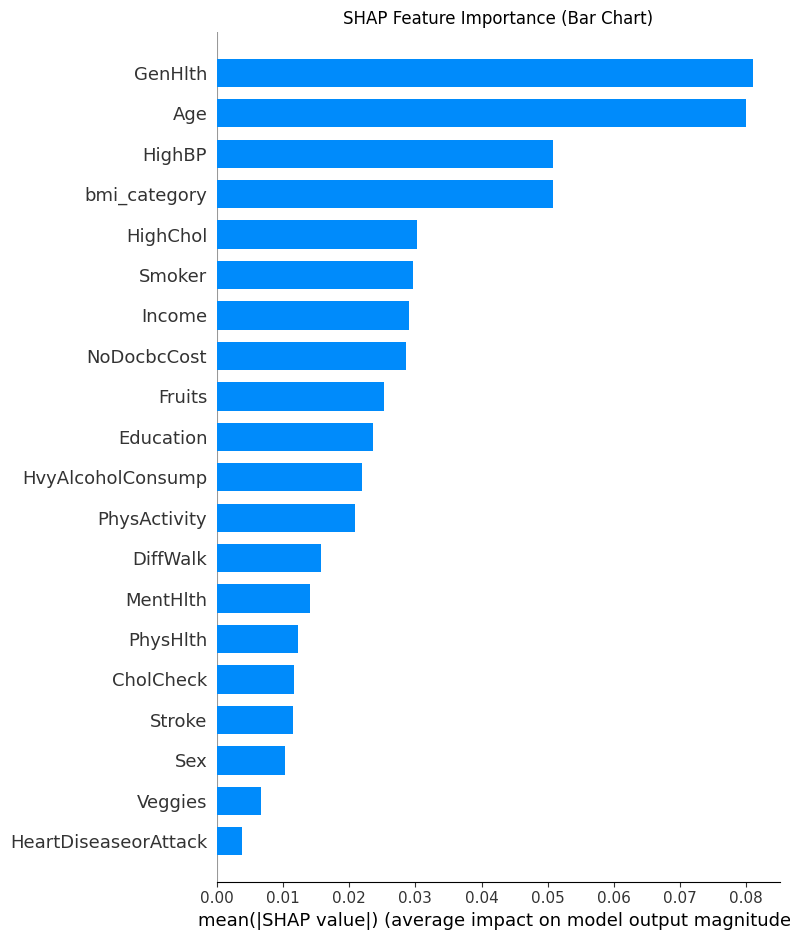

Creating SHAP waterfall plot for first prediction...


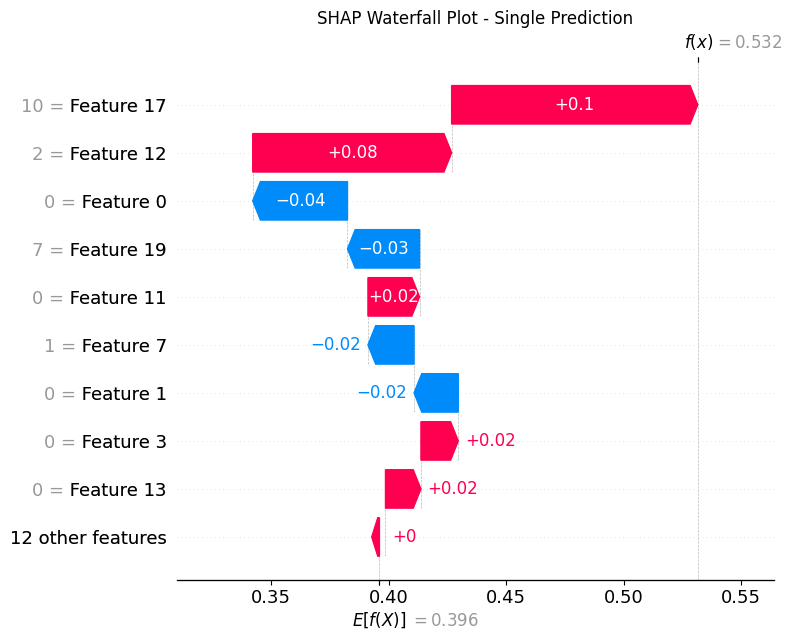

=== INTERPRETING RED POINTS LEFT OF ZERO ===

Smoker:
  High values reducing diabetes risk: 87 cases
  Average SHAP when feature is high: -0.041
  Clinical interpretation: Higher Smoker → Lower diabetes risk

Stroke:
  High values reducing diabetes risk: 9 cases
  Average SHAP when feature is high: -0.101
  Clinical interpretation: Higher Stroke → Lower diabetes risk

HeartDiseaseorAttack:
  High values reducing diabetes risk: 15 cases
  Average SHAP when feature is high: -0.014
  Clinical interpretation: Higher HeartDiseaseorAttack → Lower diabetes risk

HvyAlcoholConsump:
  High values reducing diabetes risk: 14 cases
  Average SHAP when feature is high: -0.222
  Clinical interpretation: Higher HvyAlcoholConsump → Lower diabetes risk
✅ FFNN variables loaded:
   best_val_f1: 0.4263
   Test metrics - Acc: 0.6875, Prec: 0.2944, Rec: 0.7473, F1: 0.4224, AUC: 0.7764


In [8]:
print("🔄 Loading FFNN model and results from SHAP notebook...")
%run -i gluco-track-week4-SHAP.ipynb

# Now the FFNN variables should be available
print(f"✅ FFNN variables loaded:")
print(f"   best_val_f1: {best_val_f1:.4f}")
print(f"   Test metrics - Acc: {acc:.4f}, Prec: {prec:.4f}, Rec: {rec:.4f}, F1: {f1:.4f}, AUC: {auc:.4f}")

## **Model Training and Evaluation Loop**

In [9]:
# === MODEL COMPARISON: NEURAL NETWORK VS SIMPLER MODELS ===
# Set up the MLflow experiment
mlflow.set_experiment("Diabetes_Baseline_Models_Comparison")

# Define a dictionary of models to train
models = {
    "Logistic Regression": LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(class_weight='balanced', random_state=42),
    "Random Forest": RandomForestClassifier(class_weight='balanced', n_estimators=100, random_state=42),
    "Naive Bayes": GaussianNB()
}

# Store results for comparison
results = []

print("=== TRAINING AND EVALUATING BASELINE MODELS ===\n")

# First, add your FFNN results from the imported variables
print("🔄 Adding FFNN results to comparison...")

# Calculate missing validation metrics for FFNN
model.eval()
y_val_pred_ffnn = []
y_val_prob_ffnn = []

with torch.no_grad():
    for X_batch, y_batch in val_loader:
        X_batch = X_batch.to(device)
        outputs = model(X_batch)
        outputs = outputs.unsqueeze(1) if outputs.dim() == 1 else outputs
        y_val_prob_ffnn.extend(outputs.cpu().numpy().flatten())
        y_val_pred_ffnn.extend((outputs.cpu().numpy().flatten() > 0.5).astype(int))

# Create FFNN results dictionary
ffnn_results = {
    'Model': 'Feed Forward Neural Network',
    'Val_Accuracy': accuracy_score(y_val, y_val_pred_ffnn),
    'Val_Precision': precision_score(y_val, y_val_pred_ffnn),
    'Val_Recall': recall_score(y_val, y_val_pred_ffnn),
    'Val_F1': f1_score(y_val, y_val_pred_ffnn),
    'Val_AUC': roc_auc_score(y_val, y_val_prob_ffnn),
    'Test_Accuracy': acc,
    'Test_Precision': prec,
    'Test_Recall': rec,
    'Test_F1': f1,
    'Test_AUC': auc
}

# Add FFNN results to the results list
results.append(ffnn_results)

print(f"--- Feed Forward Neural Network Results ---")
print(f"Validation - Accuracy: {ffnn_results['Val_Accuracy']:.4f}, Precision: {ffnn_results['Val_Precision']:.4f}, Recall: {ffnn_results['Val_Recall']:.4f}, F1: {ffnn_results['Val_F1']:.4f}, AUC: {ffnn_results['Val_AUC']:.4f}")
print(f"Test - Accuracy: {ffnn_results['Test_Accuracy']:.4f}, Precision: {ffnn_results['Test_Precision']:.4f}, Recall: {ffnn_results['Test_Recall']:.4f}, F1: {ffnn_results['Test_F1']:.4f}, AUC: {ffnn_results['Test_AUC']:.4f}")
print()

# Loop through each traditional ML model to train, evaluate, and log with MLflow
for model_name, model_instance in models.items():
    print(f"🔄 Training {model_name}...")
    
    # Start a new MLflow run for each model
    with mlflow.start_run(run_name=f"{model_name}_baseline"):
        
        # Train the model on the training data
        model_instance.fit(X_train_scaled, y_train_resampled)

        # Make predictions on validation and test sets
        y_val_pred = model_instance.predict(X_val_scaled)
        y_test_pred = model_instance.predict(X_test_scaled)
        
        # Get prediction probabilities for AUC calculation
        if hasattr(model_instance, "predict_proba"):
            y_val_prob = model_instance.predict_proba(X_val_scaled)[:, 1]
            y_test_prob = model_instance.predict_proba(X_test_scaled)[:, 1]
        else:
            # For models without predict_proba, use decision_function or predictions
            y_val_prob = y_val_pred
            y_test_prob = y_test_pred

        # Calculate validation metrics
        val_accuracy = accuracy_score(y_val, y_val_pred)
        val_precision = precision_score(y_val, y_val_pred)
        val_recall = recall_score(y_val, y_val_pred)
        val_f1 = f1_score(y_val, y_val_pred)
        val_auc = roc_auc_score(y_val, y_val_prob) if len(np.unique(y_val_prob)) > 1 else 0.5

        # Calculate test metrics
        test_accuracy = accuracy_score(y_test, y_test_pred)
        test_precision = precision_score(y_test, y_test_pred)
        test_recall = recall_score(y_test, y_test_pred)
        test_f1 = f1_score(y_test, y_test_pred)
        test_auc = roc_auc_score(y_test, y_test_prob) if len(np.unique(y_test_prob)) > 1 else 0.5

        # Log model parameters and metrics to MLflow
        mlflow.log_params(model_instance.get_params())
        
        # Log validation metrics
        mlflow.log_metric("val_accuracy", val_accuracy)
        mlflow.log_metric("val_precision", val_precision)
        mlflow.log_metric("val_recall", val_recall)
        mlflow.log_metric("val_f1_score", val_f1)
        mlflow.log_metric("val_auc", val_auc)
        
        # Log test metrics
        mlflow.log_metric("test_accuracy", test_accuracy)
        mlflow.log_metric("test_precision", test_precision)
        mlflow.log_metric("test_recall", test_recall)
        mlflow.log_metric("test_f1_score", test_f1)
        mlflow.log_metric("test_auc", test_auc)

        # Create and save confusion matrix
        cm = confusion_matrix(y_test, y_test_pred)
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
        plt.title(f'Confusion Matrix - {model_name}')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.savefig(f"confusion_matrix_{model_name.replace(' ', '_').lower()}.png")
        mlflow.log_artifact(f"confusion_matrix_{model_name.replace(' ', '_').lower()}.png")
        plt.close()

        # Store results for comparison table
        results.append({
            'Model': model_name,
            'Val_Accuracy': val_accuracy,
            'Val_Precision': val_precision,
            'Val_Recall': val_recall,
            'Val_F1': val_f1,
            'Val_AUC': val_auc,
            'Test_Accuracy': test_accuracy,
            'Test_Precision': test_precision,
            'Test_Recall': test_recall,
            'Test_F1': test_f1,
            'Test_AUC': test_auc
        })

        # Print results
        print(f"--- {model_name} Results ---")
        print(f"Validation - Accuracy: {val_accuracy:.4f}, Precision: {val_precision:.4f}, Recall: {val_recall:.4f}, F1: {val_f1:.4f}, AUC: {val_auc:.4f}")
        print(f"Test - Accuracy: {test_accuracy:.4f}, Precision: {test_precision:.4f}, Recall: {test_recall:.4f}, F1: {test_f1:.4f}, AUC: {test_auc:.4f}")
        print()

print("✅ All models trained and evaluated!")

=== TRAINING AND EVALUATING BASELINE MODELS ===

🔄 Adding FFNN results to comparison...
--- Feed Forward Neural Network Results ---
Validation - Accuracy: 0.6912, Precision: 0.2953, Recall: 0.7349, F1: 0.4213, AUC: 0.7764
Test - Accuracy: 0.6875, Precision: 0.2944, Recall: 0.7473, F1: 0.4224, AUC: 0.7764

🔄 Training Logistic Regression...
--- Logistic Regression Results ---
Validation - Accuracy: 0.7060, Precision: 0.3025, Recall: 0.7061, F1: 0.4236, AUC: 0.7739
Test - Accuracy: 0.6994, Precision: 0.2976, Recall: 0.7099, F1: 0.4194, AUC: 0.7746

🔄 Training Decision Tree...
--- Decision Tree Results ---
Validation - Accuracy: 0.7189, Precision: 0.2490, Recall: 0.4155, F1: 0.3114, AUC: 0.5975
Test - Accuracy: 0.7155, Precision: 0.2455, Recall: 0.4149, F1: 0.3084, AUC: 0.5954

🔄 Training Random Forest...
--- Random Forest Results ---
Validation - Accuracy: 0.7667, Precision: 0.3160, Recall: 0.4511, F1: 0.3717, AUC: 0.7430
Test - Accuracy: 0.7662, Precision: 0.3171, Recall: 0.4586, F1: 0.3

=== MODEL COMPARISON SUMMARY ===

Validation Set Performance:
                         Model  Val_Accuracy  Val_Precision  Val_Recall  \
0  Feed Forward Neural Network        0.6912         0.2953      0.7349   
1          Logistic Regression        0.7060         0.3025      0.7061   
2                Decision Tree        0.7189         0.2490      0.4155   
3                Random Forest        0.7667         0.3160      0.4511   
4                  Naive Bayes        0.5950         0.2515      0.8338   

   Val_F1  Val_AUC  
0  0.4213   0.7764  
1  0.4236   0.7739  
2  0.3114   0.5975  
3  0.3717   0.7430  
4  0.3864   0.7571  

Test Set Performance:
                         Model  Test_Accuracy  Test_Precision  Test_Recall  \
0  Feed Forward Neural Network         0.6875          0.2944       0.7473   
1          Logistic Regression         0.6994          0.2976       0.7099   
2                Decision Tree         0.7155          0.2455       0.4149   
3                Random Fo

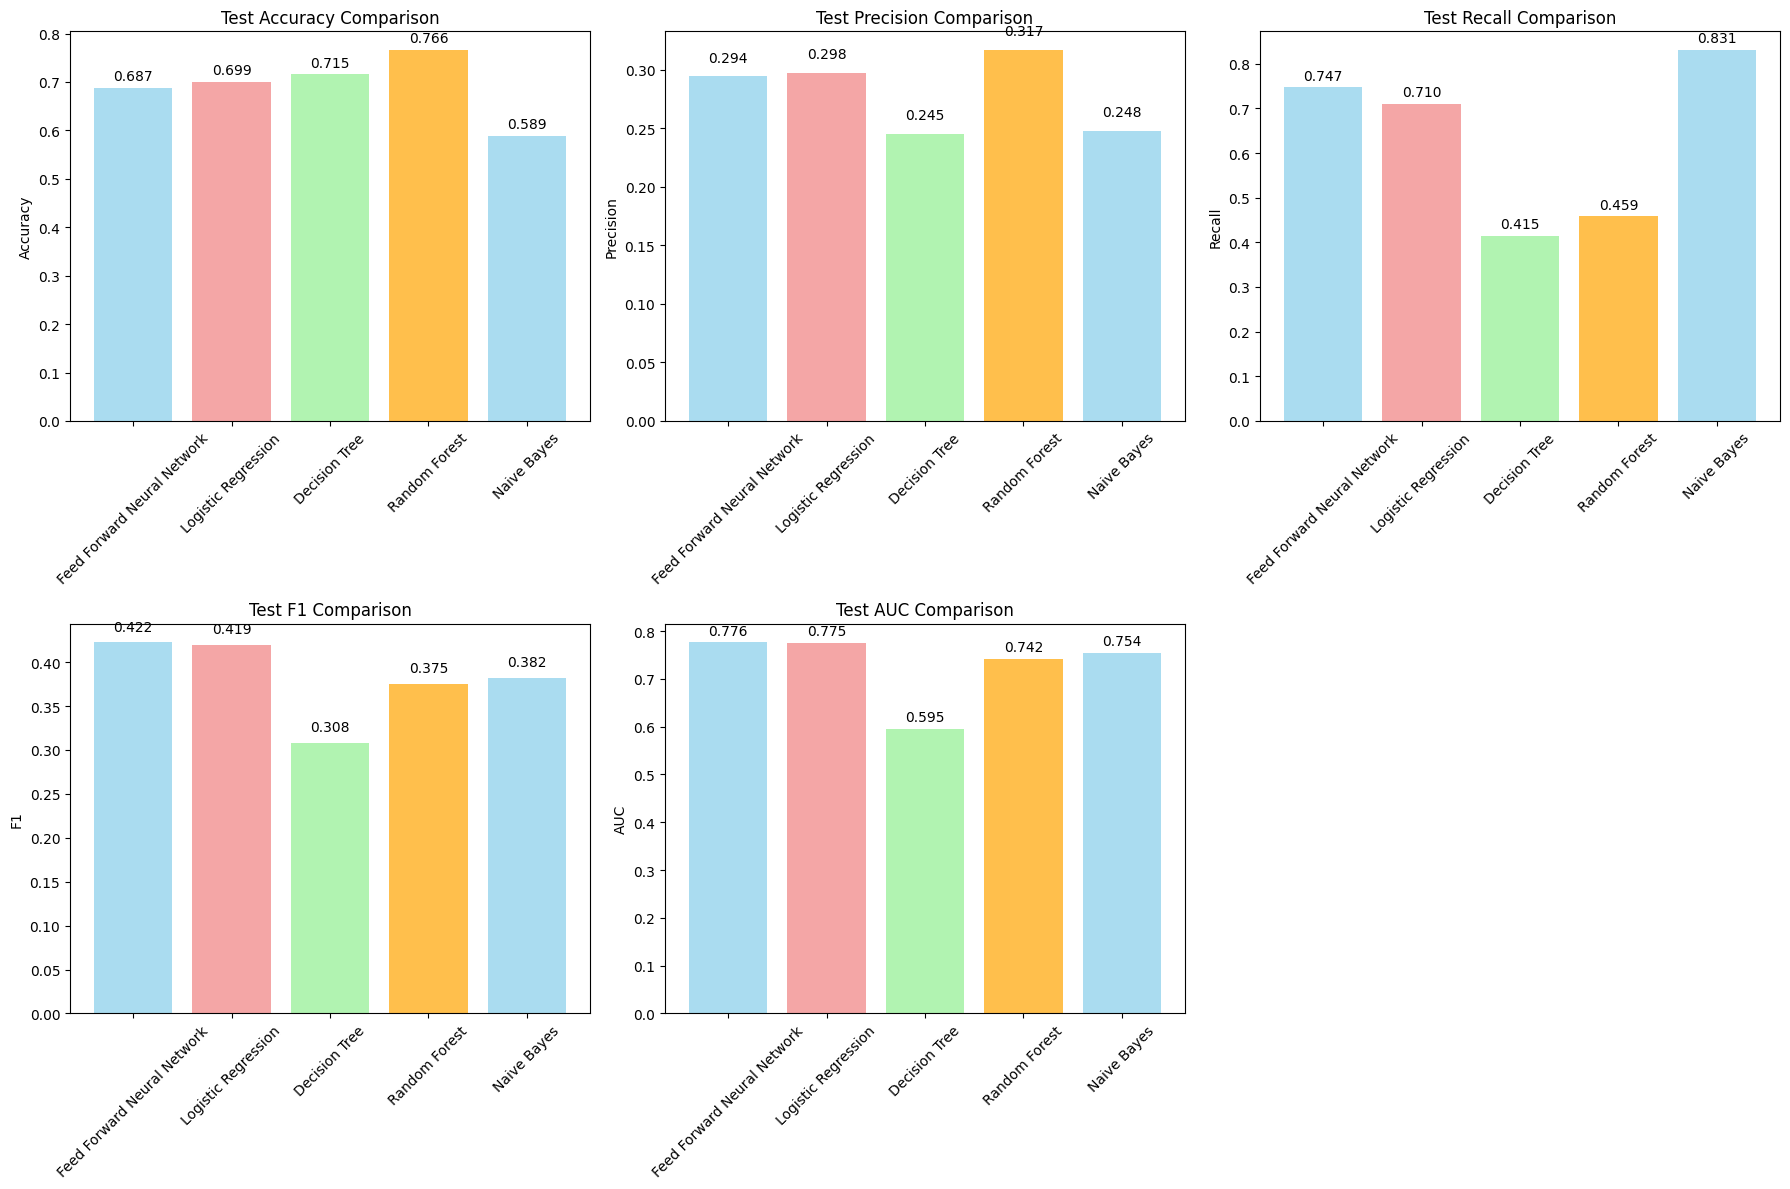


=== BEST PERFORMING MODELS BY METRIC ===
Accuracy: Random Forest (0.7662)
Precision: Random Forest (0.3171)
Recall: Naive Bayes (0.8310)
F1: Feed Forward Neural Network (0.4224)
AUC: Feed Forward Neural Network (0.7764)


In [10]:
# === MODEL COMPARISON ANALYSIS ===

# Create comparison DataFrame
comparison_df = pd.DataFrame(results)

print("=== MODEL COMPARISON SUMMARY ===")
print("\nValidation Set Performance:")
print(comparison_df[['Model', 'Val_Accuracy', 'Val_Precision', 'Val_Recall', 'Val_F1', 'Val_AUC']].round(4))

print("\nTest Set Performance:")
print(comparison_df[['Model', 'Test_Accuracy', 'Test_Precision', 'Test_Recall', 'Test_F1', 'Test_AUC']].round(4))

# Save comparison results
comparison_df.to_csv("model_comparison_results.csv", index=False)

# Create comparison visualizations
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

metrics = ['Accuracy', 'Precision', 'Recall', 'F1', 'AUC']
test_metrics = ['Test_Accuracy', 'Test_Precision', 'Test_Recall', 'Test_F1', 'Test_AUC']

for i, (metric, test_metric) in enumerate(zip(metrics, test_metrics)):
    row = i // 3
    col = i % 3
    
    ax = axes[row, col]
    
    # Create bar plot for each metric
    models_list = comparison_df['Model'].tolist()
    values = comparison_df[test_metric].tolist()
    
    bars = ax.bar(models_list, values, alpha=0.7, color=['skyblue', 'lightcoral', 'lightgreen', 'orange'])
    ax.set_title(f'Test {metric} Comparison')
    ax.set_ylabel(metric)
    ax.tick_params(axis='x', rotation=45)
    
    # Add value labels on bars
    for bar, value in zip(bars, values):
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                f'{value:.3f}', ha='center', va='bottom')

# Remove empty subplot
axes[1, 2].remove()

plt.tight_layout()
plt.savefig("model_comparison_metrics.png", dpi=300, bbox_inches='tight')
plt.show()

# Identify best model for each metric
print("\n=== BEST PERFORMING MODELS BY METRIC ===")
for metric in test_metrics:
    best_idx = comparison_df[metric].idxmax()
    best_model = comparison_df.loc[best_idx, 'Model']
    best_score = comparison_df.loc[best_idx, metric]
    print(f"{metric.replace('Test_', '')}: {best_model} ({best_score:.4f})")


=== FEATURE IMPORTANCE ANALYSIS ===

--- Top 10 Features: Decision Tree ---
         feature  importance
12       GenHlth    0.128983
17           Age    0.128702
19        Income    0.100370
14      PhysHlth    0.091434
18     Education    0.074067
13      MentHlth    0.069940
20  bmi_category    0.063248
0         HighBP    0.057035
16           Sex    0.036179
1       HighChol    0.034667


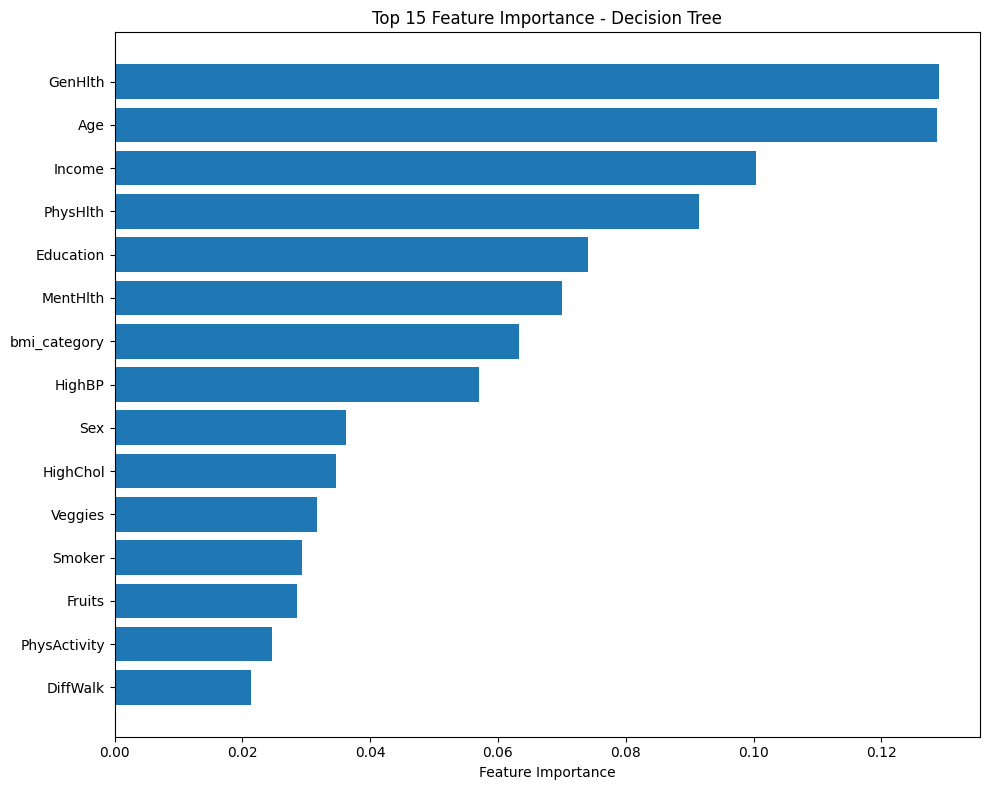


--- Top 10 Features: Random Forest ---
         feature  importance
17           Age    0.165344
19        Income    0.109852
12       GenHlth    0.094003
14      PhysHlth    0.091989
20  bmi_category    0.079904
18     Education    0.071952
13      MentHlth    0.066785
0         HighBP    0.052439
16           Sex    0.031355
3         Smoker    0.029831


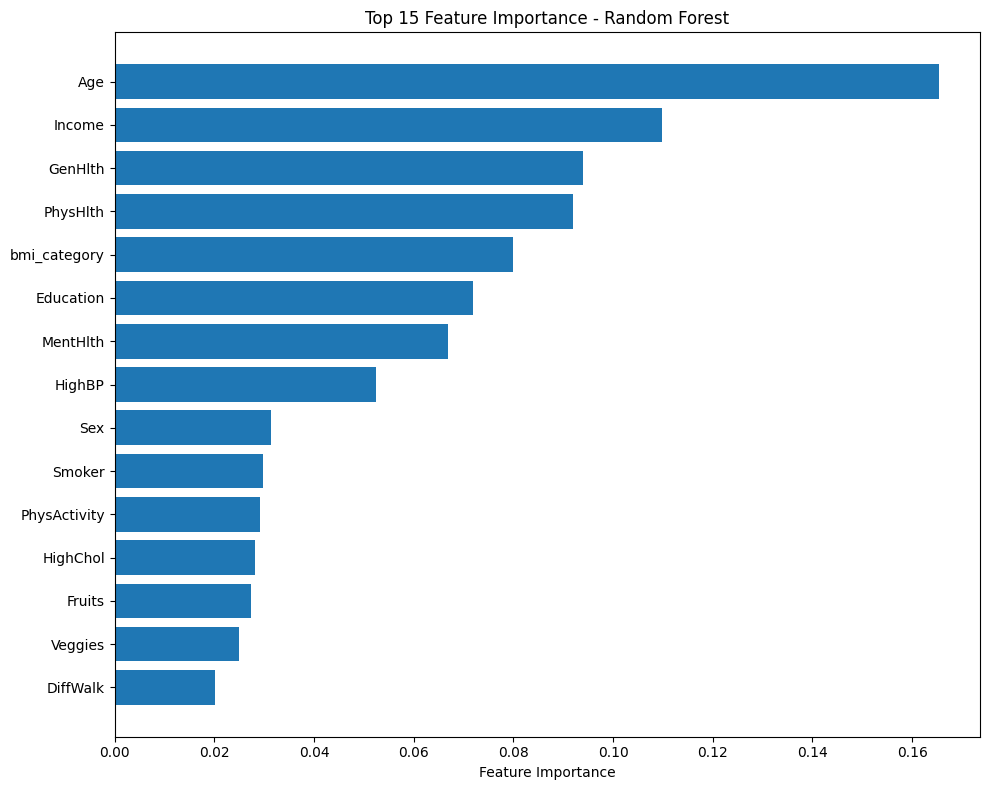


--- Top 10 Features: Logistic Regression ---
              feature  importance
9   HvyAlcoholConsump    2.072964
2           CholCheck    1.178637
11        NoDocbcCost    1.040632
4              Stroke    0.677757
0              HighBP    0.595449
12            GenHlth    0.454715
15           DiffWalk    0.394764
1            HighChol    0.383473
6        PhysActivity    0.361978
7              Fruits    0.343378


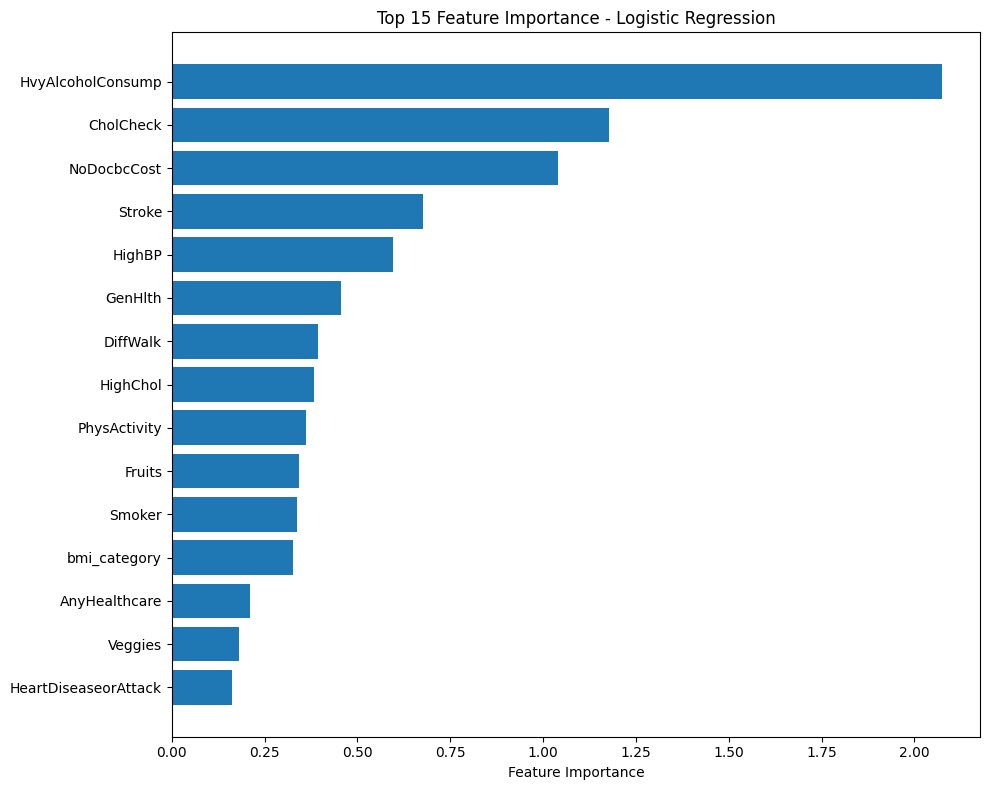


✅ Model comparison and feature importance analysis completed!


In [11]:
# === FEATURE IMPORTANCE ANALYSIS (for tree-based models) ===

print("\n=== FEATURE IMPORTANCE ANALYSIS ===")

# Train models to get feature importance
feature_importance_models = {
    "Decision Tree": DecisionTreeClassifier(class_weight='balanced', random_state=42),
    "Random Forest": RandomForestClassifier(class_weight='balanced', n_estimators=100, random_state=42),
    "Logistic Regression": LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
}

feature_names = X_train_scaled.columns.tolist()

for model_name, model in feature_importance_models.items():
    model.fit(X_train_scaled, y_train_resampled)
    
    if hasattr(model, 'feature_importances_'):
        # Tree-based models
        importances = model.feature_importances_
    elif hasattr(model, 'coef_'):
        # Linear models - use absolute coefficients
        importances = np.abs(model.coef_[0])
    else:
        continue
    
    # Create feature importance DataFrame
    feature_imp_df = pd.DataFrame({
        'feature': feature_names,
        'importance': importances
    }).sort_values('importance', ascending=False)
    
    print(f"\n--- Top 10 Features: {model_name} ---")
    print(feature_imp_df.head(10))
    
    # Plot feature importance
    plt.figure(figsize=(10, 8))
    top_features = feature_imp_df.head(15)
    plt.barh(range(len(top_features)), top_features['importance'])
    plt.yticks(range(len(top_features)), top_features['feature'])
    plt.xlabel('Feature Importance')
    plt.title(f'Top 15 Feature Importance - {model_name}')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.savefig(f"feature_importance_{model_name.replace(' ', '_').lower()}.png", dpi=300, bbox_inches='tight')
    plt.show()

print("\n✅ Model comparison and feature importance analysis completed!")

# **SUMMARY**

=== BEST PERFORMING MODELS BY METRIC ===

- Accuracy: Random Forest (0.7662)
- Precision: Random Forest (0.3171)
- Recall: Naive Bayes (0.8310)
- F1: Feed Forward Neural Network (0.4224)
- AUC: Feed Forward Neural Network (0.7764)

=== TOP FEATURES PREDICTING DIABETES RISK COMMON TO MOST ===

- General Health (1-5), Age, BMI (WHO category), High Blood Pressure, Income

Although the FFNN metrics indicate less than optimal performance, it had the highest F1 and AUC of all models.  Its Accuracy and Precision were slightly less than Random Forest.  The ranking of the predictive features from Random Forest are similar to FFNN/SHAP and Decision Tree, and may reflect a relevant clinical point of view.  Although BMI is a known risk factor for diabetes (and ranks in the top 8 for FFNN, Decision Tree and Random Forest), it is well known that lower BMI is not necessarily protective against diabetes.

The logistic regression model performed among the highest in all metrics.  However, the ranking of the predictive features was substantially different than all other models and conformed the least to a clinical perspective, with Heavy Alcohol Use ranking as the highest feature, and with BMI ranking near the bottom.

While additional hyperparameter tuning could be done, I suspect from the work shared by team members that this would not make a significant difference to these outcomes.  It may be more effective to do some feature selection to remove features with lesser importance.  It may be valuable to combine two or more features to capture relationships that individual features cannot. For example, the health risk from a high BMI might be much greater for an older person than a younger one. We may also have inherent limitations of this dataset in regard to known underlying risk factors that were not included or adequately measured. I did not attempt Gradient Boosting models, which are adept at finding complex patterns. 

Finally, it is worth considering the use case for this data set.  A data set that had included more rigorous survey techniques and use of measured clinical data may have provided valuable insights into health factors associated with diabetes risks and outcomes that could impact health policy and interventions.  Nevertheless, this data set utilized existing health survey data that employed simple responses.  As such, it is encouraging that it provided the ability to yield clinically relevant findings in spite of the biases and limitations.